In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:\\datasets\\Position_salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
real_x=data.iloc[:,1].values
real_x


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [4]:
#reshape your data 
real_x=real_x.reshape(-1,1)
real_x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
real_y=data.iloc[:,2].values
real_y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [6]:
real_y=real_y.reshape(-1,1)
real_y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [7]:
# we have a small dataset so we dont need to split the dataset if we have large then then we need to split

from sklearn.linear_model import LinearRegression

In [8]:
linear_reg=LinearRegression()
linear_reg.fit(real_x,real_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly_reg=PolynomialFeatures(degree=2)
poly_x=poly_reg.fit_transform(real_x)

In [11]:
poly_x

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [12]:
poly_reg.fit(poly_x,real_y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [13]:
linear_reg2=LinearRegression()
linear_reg2.fit(poly_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

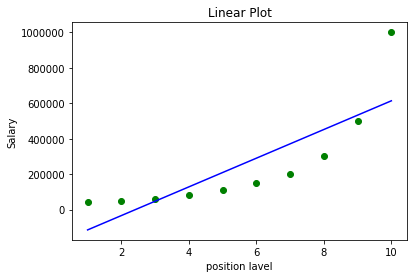

In [14]:
# plot the training data
plt.scatter(real_x,real_y,color="green")
plt.plot(real_x,linear_reg.predict(real_x),color='blue')
plt.title("Linear Plot")
plt.xlabel("position lavel")
plt.ylabel("Salary")
plt.show()

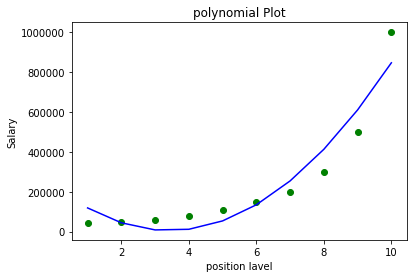

In [15]:
plt.scatter(real_x,real_y,color="green")
plt.plot(real_x,linear_reg2.predict(poly_reg.fit_transform(real_x)),color='blue')
plt.title("polynomial Plot")
plt.xlabel("position lavel")
plt.ylabel("Salary")
plt.show()           # this polynomial plot is 2 degree show it can not touch the point

In [16]:
# now plot the 4 degree polynomial plot


poly_reg=PolynomialFeatures(degree=4)
poly_x=poly_reg.fit_transform(real_x)

poly_reg.fit(poly_x,real_y)

linear_reg2=LinearRegression()
linear_reg2.fit(poly_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

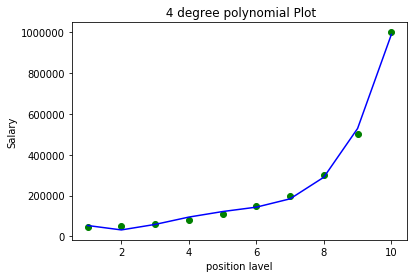

In [17]:
plt.scatter(real_x,real_y,color="green")
plt.plot(real_x,linear_reg2.predict(poly_reg.fit_transform(real_x)),color='blue')
plt.title(" 4 degree polynomial Plot")
plt.xlabel("position lavel")
plt.ylabel("Salary")
plt.show()   

In [18]:
linear_reg.predict(np.reshape((6.5),(1,-1)))

array([[330378.78787879]])